# Test in Geometric Random Graphs

***Hirri Hicham / Ghanem Abderahmane / Balendran Alan***

`April, 2020`

**Ben-Hamou Anna** 

We will try to illustrate in this notebook the triangle test
which goal is to tell us wheter a graph comes from a random
**Erdos-Renys Graph** or a **Random Geometric Graph** which can be reformulate as follow:

$$ H_{0}: G \sim G(n, p), \quad H_{1}: G \sim G(n, p, d) $$

`Remark`:We will take `p`=0.5 throughout these simulations

#### Table of contents
1. [Erdos-Renyi Graph](#part1)
1. [Geometric Graph](#part2)
1. [Unsigned/Signed Triangles](#part3)
1. [Triangle test](#part4)

In [2]:
options(warn=-1)
library('igraph')
library(ggplot2)
library(gridExtra)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union




## Erdos-Renyi Graph <a id="part1"></a> 

Returns a ***Erdos-Renyi graph*** of `n vertices` where each egde is present with a `probability p`

In [3]:
ErdosR<-function(n,p=0.5){
  G<-matrix(data=0,nrow=n,ncol = n)
  for(i in 1:n){
    for(j in 1:(i-1)){
        G[i,j]=rbinom(1,1,p)
        G[j,i]=G[i,j]
      
    }
  }
  diag(G)<-0
  return(G)
}

## Random Geometric Graph <a id="part2"></a>

Returns a ***Random Geometric Graph*** of `n vertices` where each egde is present if and only if $ \left\langle X_{i}, X_{j}\right\rangle \geq t_{p, d}$  where the threshold value $t_{p, d} \in[-1,1]$ is such that $\mathbb{P}\left(\left\langle X_{1}, X_{2}\right\rangle \geq t_{p, d}\right)=p .$ For example, when $p=1 / 2$ we have $t_{p, d}=0$

In [4]:
GeometricGraph<-function(n,t_pd=0,d){
  G<-matrix(data=0,nrow=n,ncol=n)
  psphere=matrix(runif(n*d,min=-1,max=1),nrow=n) ##draw n*d points uniformly on [-1,1] 
  psphere_normed=psphere/apply(psphere,1,function(x){norm(x,type='2')}) ##normalized the obtained points
  mat_scal=psphere_normed%*%t(psphere_normed) ##compute the inner product between each points
  G[mat_scal>t_pd]=1 ##connect two vertices if their distance is above the treshold.
  diag(G)<-0
  return(G)
}

## Triangles counts <a id="part3"></a>

Compute the number of unsigned and signed triangles for a given Graph using its adjacency matrix.

Indeed if we denote by A the adjacency matrix of a graph:

> The number of `unsigned triangles` is given by:
$$\operatorname{Tr}\left(A^{3}\right)$$

> The number of `signed triangles` is given by:
$$\operatorname{Tr}\left((A-p(J-I))^{3}\right)$$
where $I$ is the identity matrix and $J$ is the matrix with $1$ at each entry


In [5]:
number_triangle<-function(Graphe){
    mat<-Graphe%*%Graphe%*%Graphe
    return(sum(diag(mat)))
}
number_signed_triangle<-function(Graphe,p=0.5){
    n<-nrow(Graphe)
    J<-matrix(1,nrow = n,ncol = n)
    mat<-Graphe-p*(J-diag(n))
    mat<-mat%*%mat%*%mat
    return(sum(diag(mat)))
}

## Triangle test <a id="part4"></a>

The test that we studied in the article

$$T(G)=1_\left\{\Delta(G) \geq \frac{c_{p}\left(\frac{n}{3}\right)}{2 \sqrt{d}}\right\}$$

In [6]:
test_triangle<-function(Graphe,d,p,cp){
    n<-nrow(Graphe)
    delta<-number_signed_triangle(Graphe,p)
    maj<-cp*choose(n,3)/(2*sqrt(d))
    return(delta>=maj)
}
test_triangle1<-function(Graphe,d,cp){
    n<-nrow(Graphe)
    delta<-number_triangle(Graphe)
    maj<-cp*choose(n,3)/(2*sqrt(d))
    return(delta>=maj)
}

> Some functional functions,namely one that draws a Graph $G$ and one which displays the number of Unsigned/Signed triangles for a given Graph $G$ 

In [7]:
draw_graphs<-function(n=20,p=0.5,d=3){
    G_Erdos<-ErdosR(n,p)
    G_Geo<-GeometricGraph(n,0,d)
    
    G_Erdos<-graph_from_adjacency_matrix(G_Erdos, mode = "undirected")
    G_Geo<-graph_from_adjacency_matrix(G_Geo, mode = "undirected")

    par(mfrow=c(1,2))
    plot(G_Erdos, vertex.label=NA, vertex.size=2,main='Erdos-Rényi')
    plot(G_Geo,vertex.label=NA, vertex.size=2,main='Geometric Graph')
  
}
draw_graph<-function(Graphe){
    G_<-graph_from_adjacency_matrix(Graphe, mode = "undirected")
    par(mfrow=c(1,2))
    plot(G_, vertex.label=NA, vertex.size=2)
}

N_triangle_comparaison<-function(Graphe){
    Number <- c(number_triangle(Graphe),number_signed_triangle(Graphe))
    data_triangle <- data.frame(Number)
    row.names(data_triangle)<-c('Unsigned Triangles', 'Signed Triangles')
    grid.table(data_triangle)
}

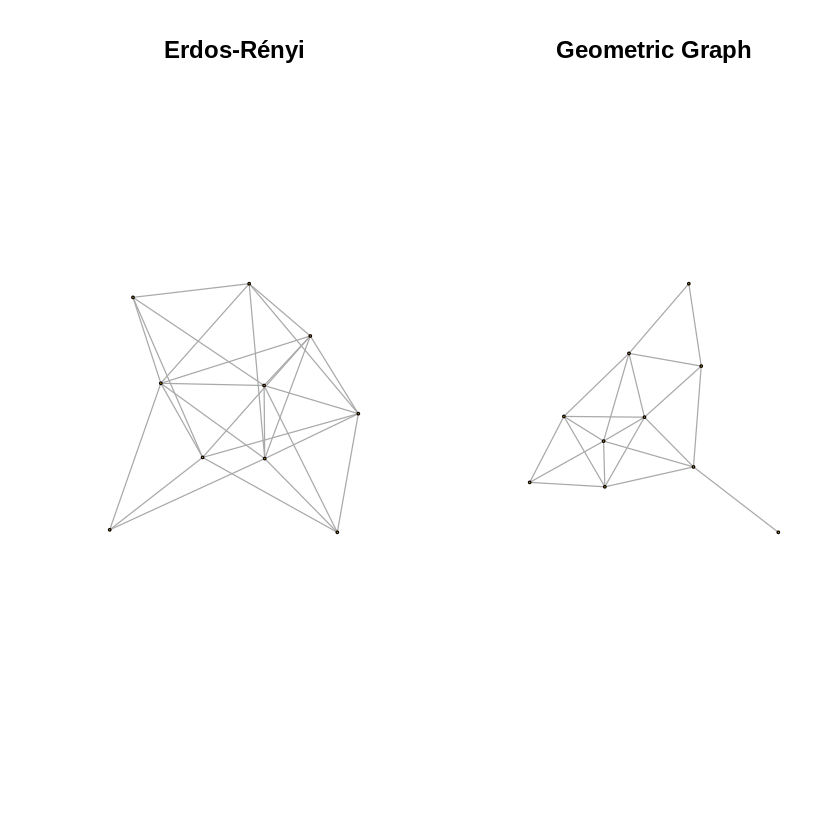

In [8]:
draw_graphs(n=10,d=5)

In [16]:
## Parameter initialisation

n<-9 ## number of vertices in the graph
p<-0.5 ## probability p
d_max<-2.5*(n**3) ## maximum of dimension to be tested
c_p<-15##constant appearing in the expectation of the number of signed-triangles, needs to be tuned
C_p<-32##constant appearing in the expectation of the number of unsigned-triangles, also needs to be tuned

In [17]:
Test_ST<-c()
Test_UT<-c()
for(i in 1:d_max){
    Gr<-GeometricGraph(n,0,i)
    Test_ST<-c(Test_ST,test_triangle(Gr,i,p,c_p))
    Test_UT<-c(Test_UT,test_triangle1(Gr,i,C_p))

}

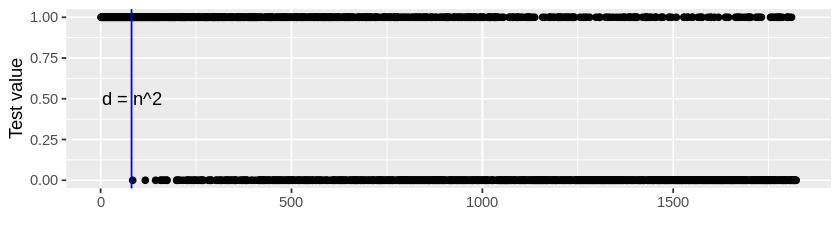

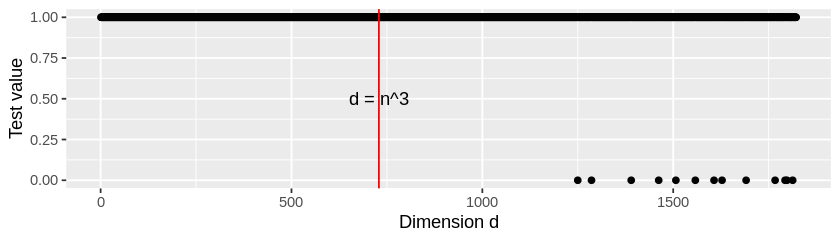

In [18]:
options(repr.plot.width = 7, repr.plot.height = 2)

g1<-ggplot()+geom_point(aes(x=1:d_max,y=1-Test_UT))+geom_vline(xintercept = n**2,col='blue',labe)+xlab('')+ylab('Test value')
g1<-g1+geom_text(aes(x = n**2, y = 0.5, label = "d = n^2")) 

g2<-ggplot()+geom_point(aes(x=1:d_max,y=1-Test_ST))+geom_vline(xintercept = n**3,col='red')+xlab('Dimension d')+ylab('Test value')
g2<-g2+geom_text(aes(x = n**3, y = 0.5, label = "d = n^3")) 

par(mfrow=c(2,1))
g1
g2

> We can clearly see that by using the power of using `signed-triangles`, the treshold for detecting an underlying geometry is higher than when we use `unsigned-triangles`.

>Remark:The two constant `C_p` and `c_p` need to be tuned correctly in order to have better results.